In [37]:
import numpy as np
from scipy.stats import norm
import time
start_time = time.time()
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix #Classification report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [3]:
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [7]:
#Q1 A - Import ‘signal-data.csv’ as DataFrame.

path="/content/drive/MyDrive/AIMLCOURSE/FeaturizationandModelTraining/signal-data.csv"

signaldata=pd.read_csv(path)
signaldata.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [8]:
#Q1B - Print 5 point summary and share at least 2 observations.

# Print 5-point summary
summary = signaldata.describe()

# Display the summary
print(summary)

                 0            1            2            3            4  \
count  1561.000000  1560.000000  1553.000000  1553.000000  1553.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.621787    80.407705    29.513152   441.691640    56.355540   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.260000  2452.247500  2181.044400  1081.875800     1.017700   
50%    3011.490000  2499.405000  2201.066700  1285.214400     1.316800   
75%    3056.650000  2538.822500  2218.055500  1591.223500     1.525700   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

            5            6            7            8            9  ...  \
count  1553.0  1553.000000  1558.000000  1565.000000  1565.000000  ...   
mean    100.0   101.112908     0.121822     1.462862    -0.000841  ...   
std       0.0     6.237214     0.008961     0.073897     0.015116  ...   
min     100.0    82.131100     0.0000

In [10]:
#Q2 A - Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature.

import pandas as pd

# Step 1: Identify features with 20% or more null values
null_threshold = 0.2  # 20%
null_counts = signaldata.isnull().mean()
features_to_remove = null_counts[null_counts >= null_threshold].index

# Step 2: Remove features with 20% or more null values
signaldata = signaldata.drop(columns=features_to_remove)

# Step 3: Impute remaining null values with the mean of each feature (skip non-numeric columns)
for column in signaldata.columns:
    if signaldata[column].dtype in [float, int]:
        mean_value = signaldata[column].mean()
        signaldata[column].fillna(mean_value, inplace=True)

# Display the modified DataFrame
print(signaldata.head())


                  Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8  ...      577     582     583     584      585  \
0   97.6133  0.1242  1.5005  ...  14.9509  0.5005  0.0118  0.0035   2.3630   
1  102.3433  0.1247  1.4966  ...  10.9003  0.5019  0.0223  0.0055   4.4447   
2   95.4878  0.1241  1.4436  ...   9.2721  0.4958  0.0157  0.0039   3.1745   
3  104.2367  0.1217  1.4882  ...   8.5831  0.4990  0.0103  0.0025   2.0544   
4  100.3967  0.1235  1.5031  ...  10.9698  0.4800  0.4766  0.1045  99.3032   

        586       587       588         589 

In [11]:
#Q2 B - Identify and drop the features which are having same value for all the rows.

# Step 1: Identify features with the same value for all rows
constant_features = signaldata.columns[signaldata.nunique() == 1]

# Step 2: Drop features with the same value for all rows
signaldata = signaldata.drop(columns=constant_features)

# Display the modified DataFrame
print(signaldata.head())


                  Time        0        1          2          3       4  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334   

          6       7       8       9  ...      577     582     583     584  \
0   97.6133  0.1242  1.5005  0.0162  ...  14.9509  0.5005  0.0118  0.0035   
1  102.3433  0.1247  1.4966 -0.0005  ...  10.9003  0.5019  0.0223  0.0055   
2   95.4878  0.1241  1.4436  0.0041  ...   9.2721  0.4958  0.0157  0.0039   
3  104.2367  0.1217  1.4882 -0.0124  ...   8.5831  0.4990  0.0103  0.0025   
4  100.3967  0.1235  1.5031 -0.0031  ...  10.9698  0.4800  0.4766  0.1045   

       585       586       587       588         589  Pass/Fail  
0   2.3630  0.021458  0.01

In [17]:
#Q2 C - Drop other features if required using relevant functional knowledge. Clearly justify the same.

"""Highly Correlated Features:

If two or more features are highly correlated, keeping all of them may not provide much additional information and can potentially lead to multicollinearity issues in certain modeling techniques (e.g., linear regression).
In such cases, we might choose to keep only one of the correlated features."""


# dropping highly correlated features
correlation_matrix = signaldata.corr()
correlated_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

signaldata = signaldata.drop(columns=correlated_features)



"""Low Variance Features:

Features with low variance (close to zero) may not contribute much information to the model.
we  can use the VarianceThreshold from scikit-learn to remove low-variance features."""


"""Other cases include:

Domain-Specific Considerations:

Sometimes, certain features may not be relevant to the specific problem or may introduce bias.
 For example, if you are predicting the price of a house, the color of the house might not be a relevant feature."""



<ipython-input-17-37f71b020186>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = signaldata.corr()


'Other cases include:\n\nDomain-Specific Considerations:\n\nSometimes, certain features may not be relevant to the specific problem or may introduce bias.\n For example, if you are predicting the price of a house, the color of the house might not be a relevant feature.'

In [18]:
#Q2 D - Check for multi-collinearity in the data and take necessary action.

from statsmodels.stats.outliers_influence import variance_inflation_factor


# Select only numeric columns for VIF calculation
numeric_columns = signaldata.select_dtypes(include=['float64', 'int64']).columns
X = signaldata[numeric_columns]

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)



# Identify highly correlated features based on a threshold (e.g., 0.8)
correlation_matrix = signaldata.corr().abs()
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]

# Drop highly correlated features
signaldata = signaldata.drop(columns=to_drop)



      Variable          VIF
0            0  2203.242568
1            1  1203.111375
2            2  8914.307454
3            3    32.267488
4            4     2.532426
..         ...          ...
217        583     2.292479
218        586     8.007469
219        587     8.317893
220        589     4.880815
221  Pass/Fail     5.338951

[222 rows x 2 columns]


<ipython-input-18-eaab577448dd>:22: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = signaldata.corr().abs()
<ipython-input-18-eaab577448dd>:23: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))


In [22]:
#Q2 E - Make all relevant modifications on the data using both functional/logical reasoning/assumptions.

"Handle missing values"
signaldata.fillna(signaldata.mean(), inplace=True)  # Replace 'mean' with 'median' if preferred


"We can do other things also, like removing/treating outliers, scaling the data and so on..."
"But a lot of these steps appear further in the project, in the subsequent questions, so we will handle it then...."

<ipython-input-22-0e396652c49b>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  signaldata.fillna(signaldata.mean(), inplace=True)  # Replace 'mean' with 'median' if preferred


'But a lot of these steps appear further in the project, in the subsequent questions, so we will handle it then....'

Summary for 0:
count    1567.000000
mean     3014.452896
std        73.480613
min      2743.240000
25%      2966.665000
50%      3011.840000
75%      3056.540000
max      3356.350000
Name: 0, dtype: float64


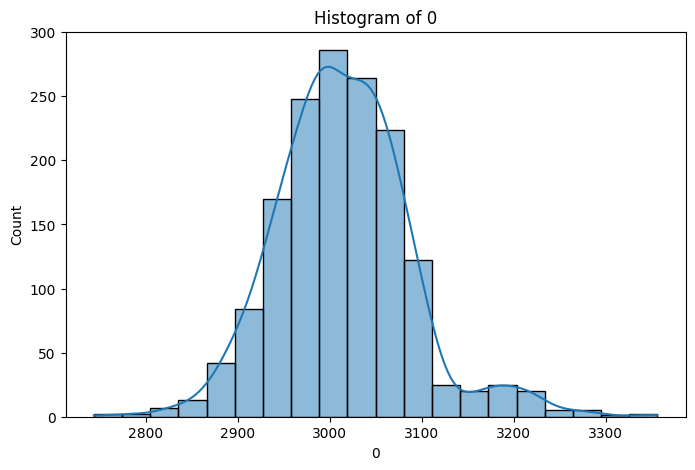

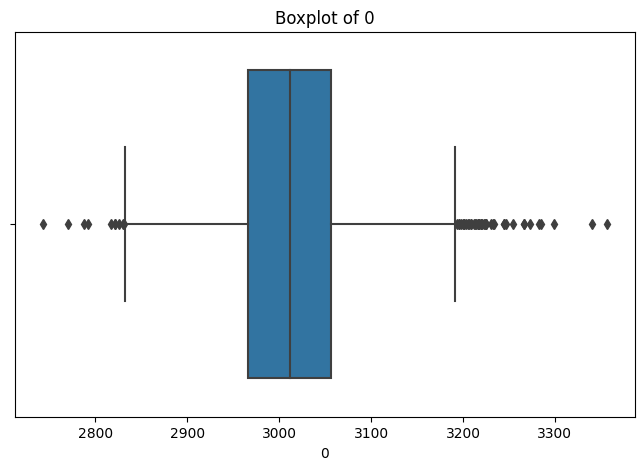

Summary for 1:
count    1567.000000
mean     2495.850231
std        80.227793
min      2158.750000
25%      2452.885000
50%      2498.910000
75%      2538.745000
max      2846.440000
Name: 1, dtype: float64


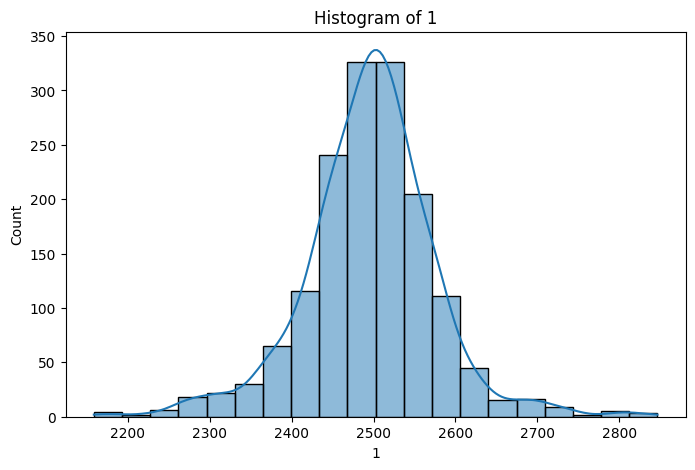

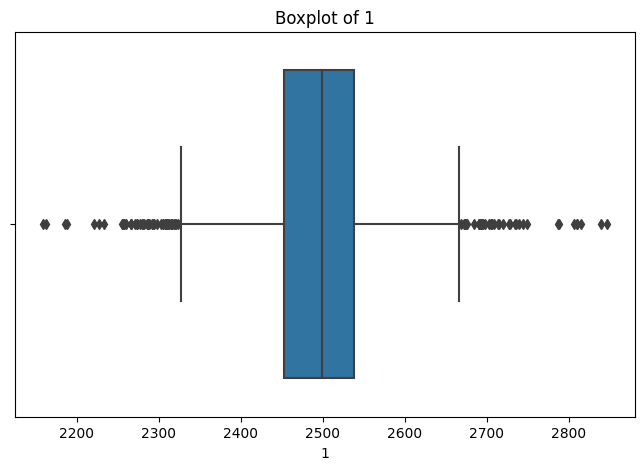

Summary for 2:
count    1567.000000
mean     2200.547318
std        29.380932
min      2060.660000
25%      2181.099950
50%      2200.955600
75%      2218.055500
max      2315.266700
Name: 2, dtype: float64


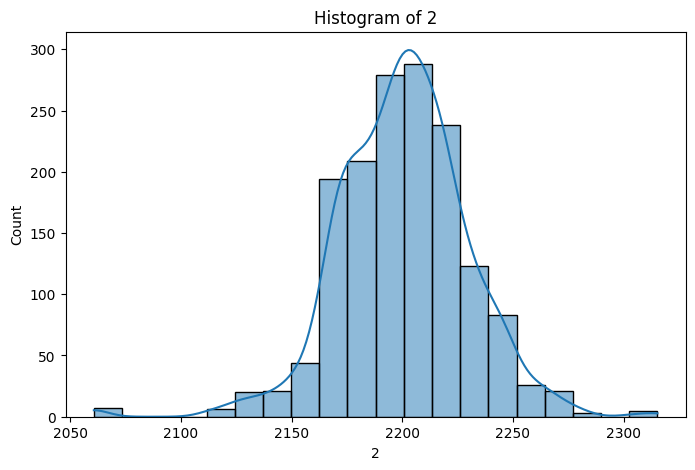

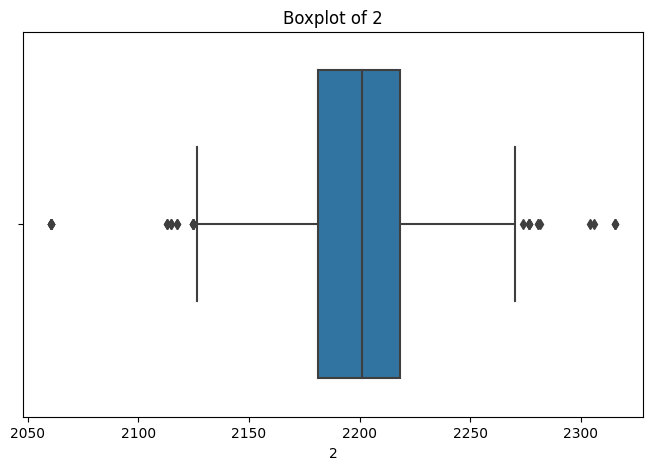

Summary for 3:
count    1567.000000
mean     1396.376627
std       439.712852
min         0.000000
25%      1083.885800
50%      1287.353800
75%      1590.169900
max      3715.041700
Name: 3, dtype: float64


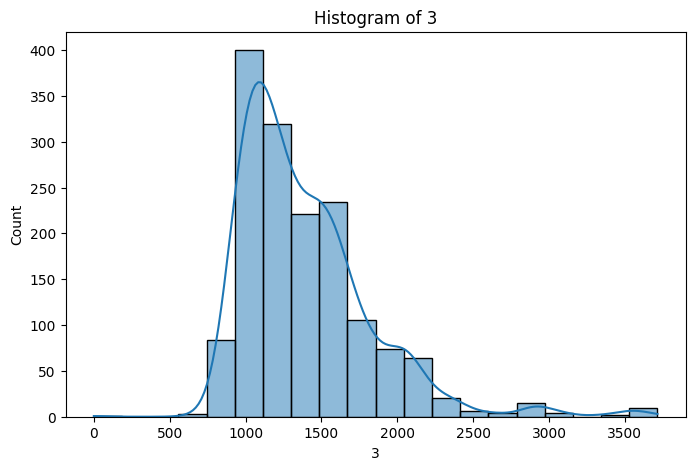

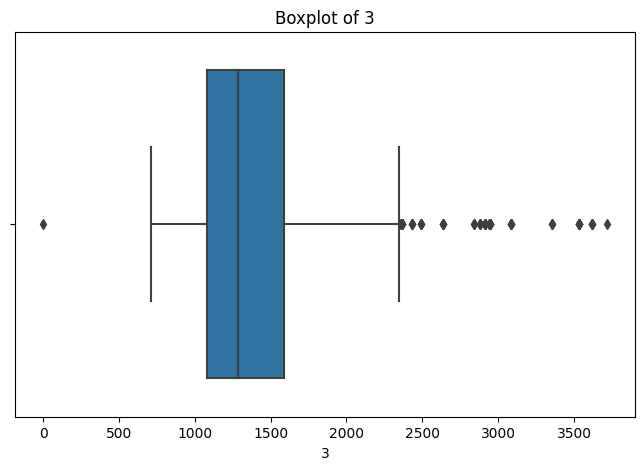

Summary for 4:
count    1567.000000
mean        4.197013
std        56.103066
min         0.681500
25%         1.017700
50%         1.317100
75%         1.529600
max      1114.536600
Name: 4, dtype: float64


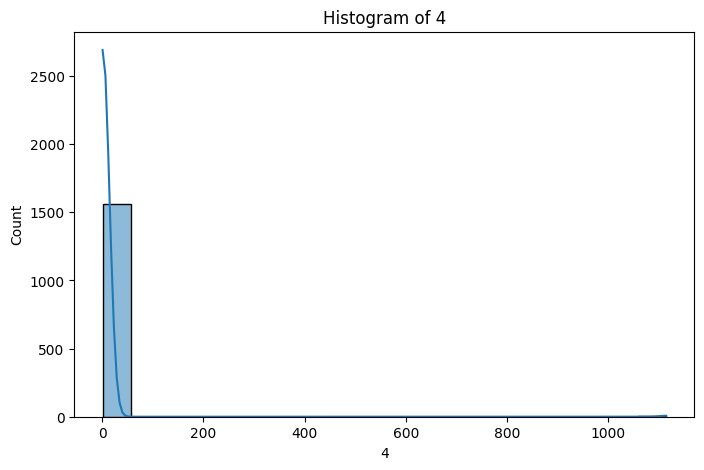

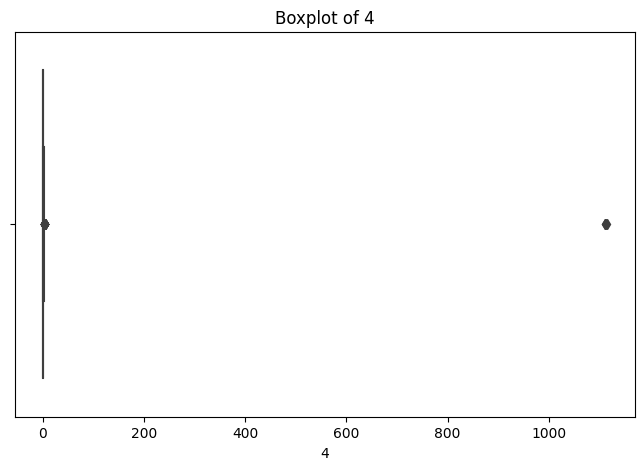

Summary for 6:
count    1567.000000
mean      101.112908
std         6.209271
min        82.131100
25%        97.937800
50%       101.492200
75%       104.530000
max       129.252200
Name: 6, dtype: float64


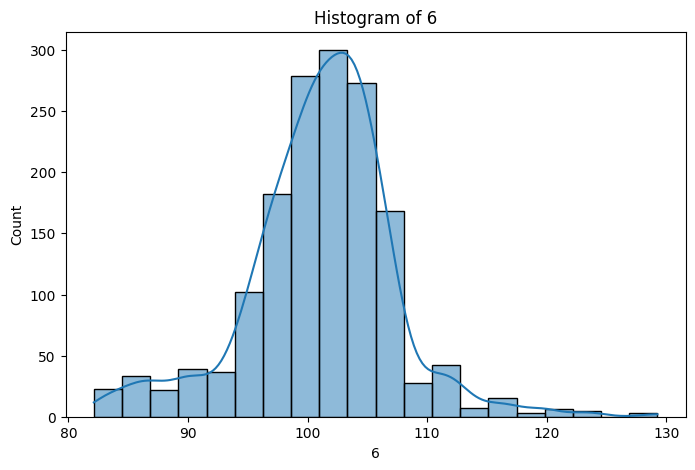

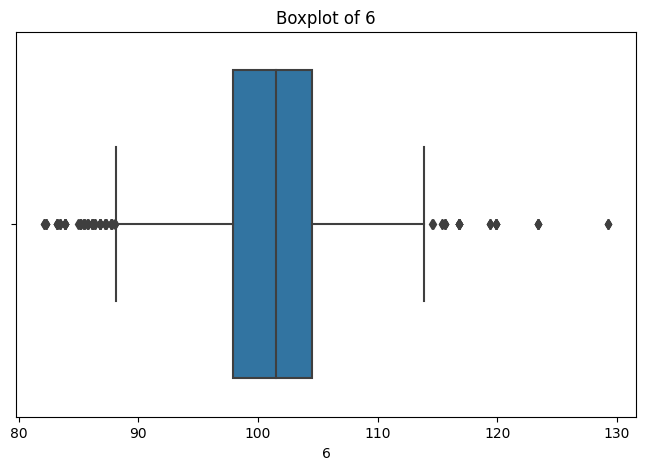

Summary for 7:
count    1567.000000
mean        0.121822
std         0.008936
min         0.000000
25%         0.121100
50%         0.122400
75%         0.123800
max         0.128600
Name: 7, dtype: float64


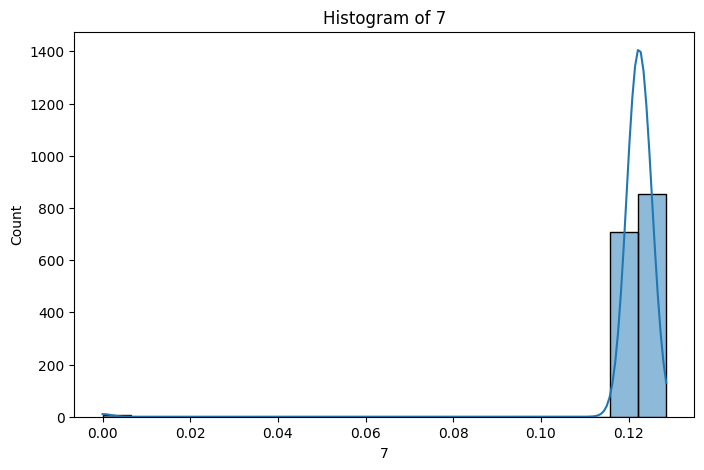

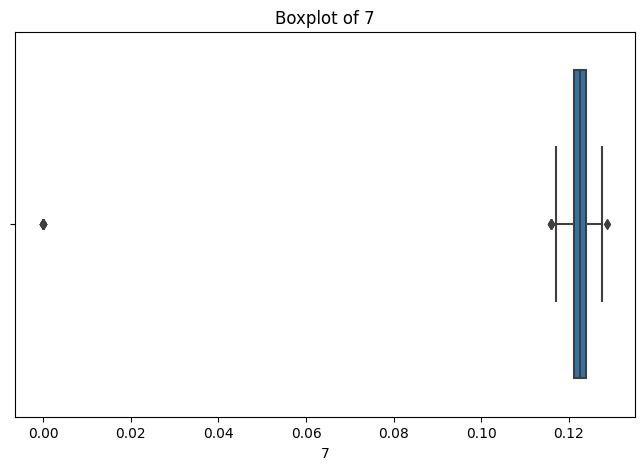

Summary for 8:
count    1567.000000
mean        1.462862
std         0.073849
min         1.191000
25%         1.411250
50%         1.461600
75%         1.516850
max         1.656400
Name: 8, dtype: float64


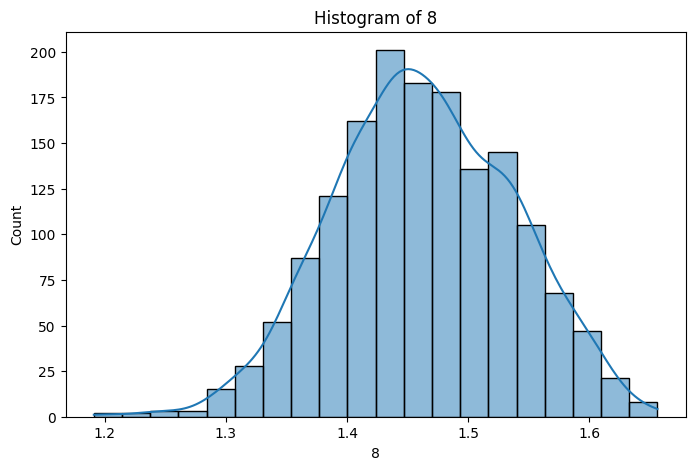

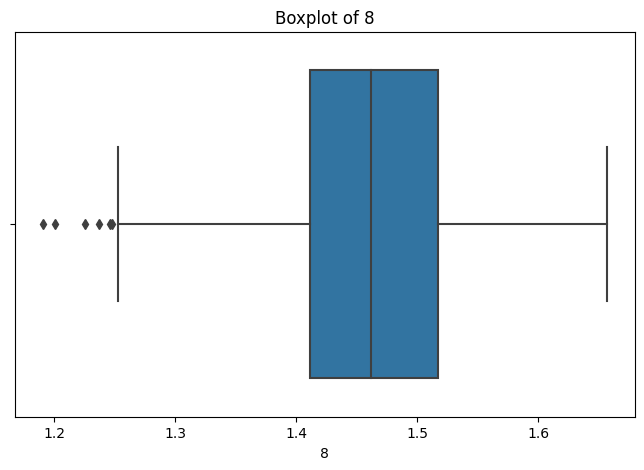

Summary for 9:
count    1567.000000
mean       -0.000841
std         0.015107
min        -0.053400
25%        -0.010800
50%        -0.001300
75%         0.008400
max         0.074900
Name: 9, dtype: float64


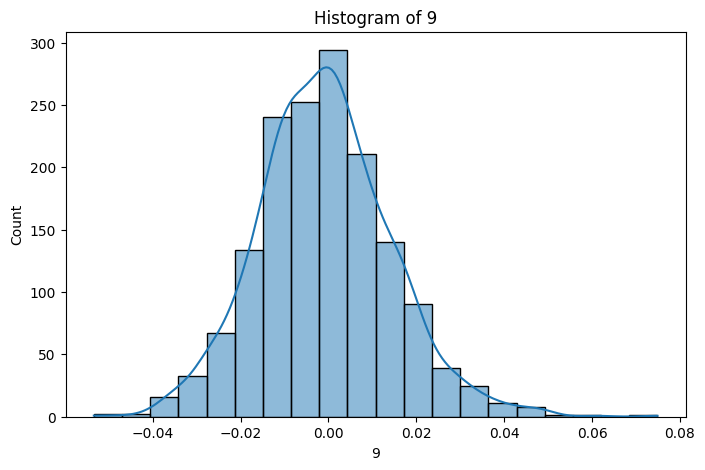

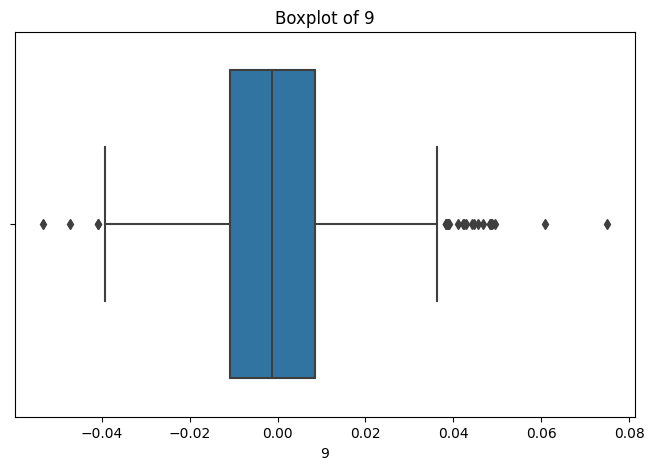

Summary for 570:
count    1567.000000
mean      530.523623
std        17.499736
min       317.196400
25%       530.702700
50%       532.398200
75%       534.356400
max       589.508200
Name: 570, dtype: float64


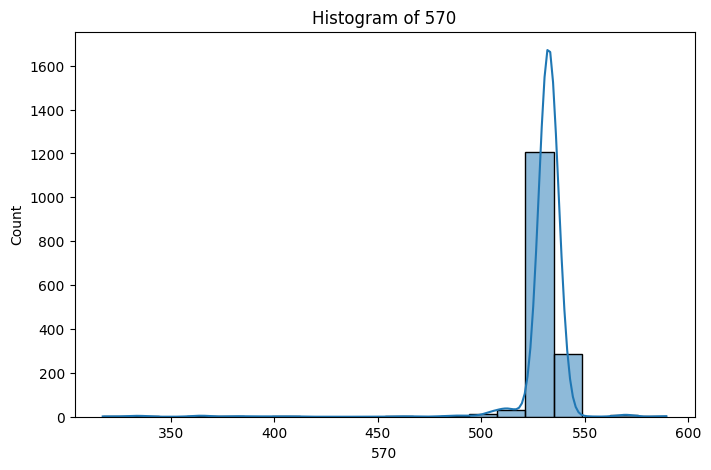

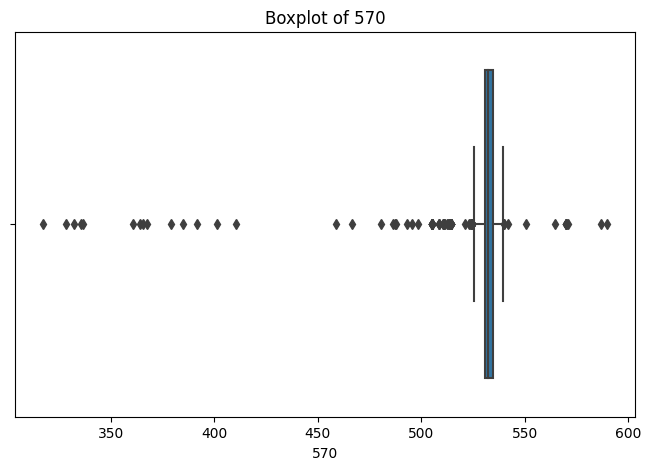

Summary for 571:
count    1567.000000
mean        2.101836
std         0.275112
min         0.980200
25%         1.982900
50%         2.118600
75%         2.290650
max         2.739500
Name: 571, dtype: float64


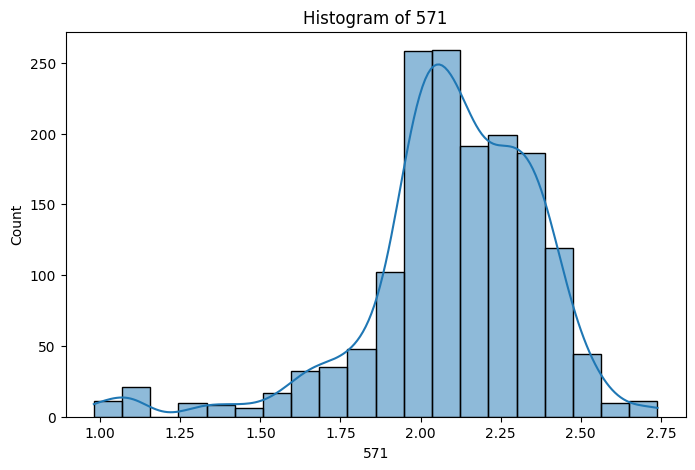

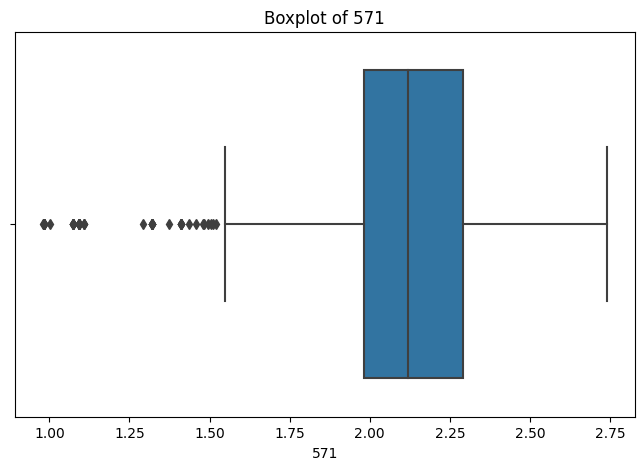

Summary for 572:
count    1567.000000
mean       28.450165
std        86.304681
min         3.540000
25%         7.500000
50%         8.650000
75%        10.130000
max       454.560000
Name: 572, dtype: float64


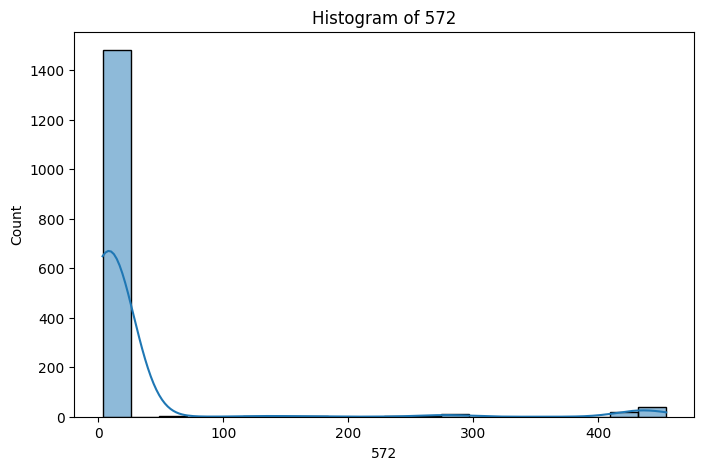

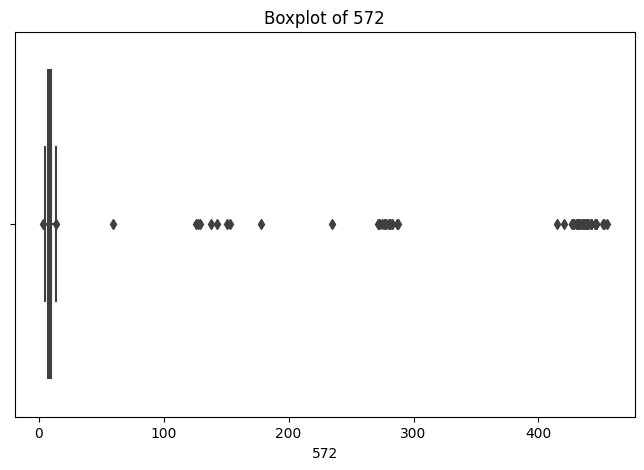

Summary for 573:
count    1567.000000
mean        0.345636
std         0.248478
min         0.066700
25%         0.242250
50%         0.293400
75%         0.366900
max         2.196700
Name: 573, dtype: float64


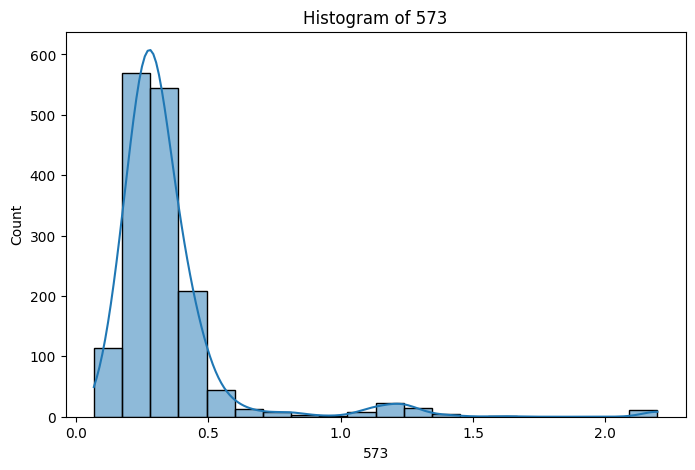

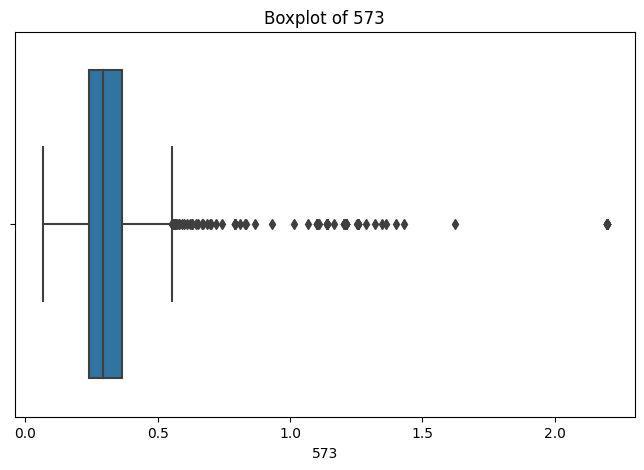

Summary for 582:
count    1567.000000
mean        0.500096
std         0.003403
min         0.477800
25%         0.497900
50%         0.500200
75%         0.502350
max         0.509800
Name: 582, dtype: float64


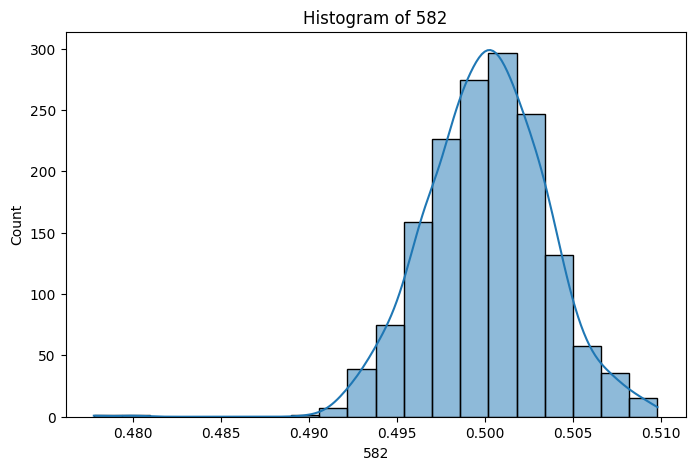

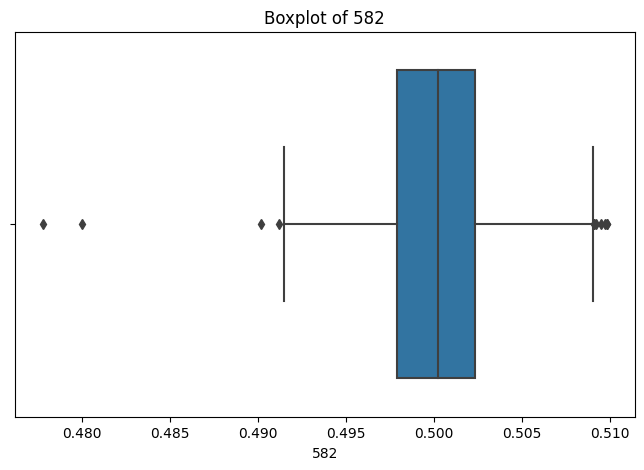

Summary for 583:
count    1567.000000
mean        0.015318
std         0.017174
min         0.006000
25%         0.011600
50%         0.013800
75%         0.016500
max         0.476600
Name: 583, dtype: float64


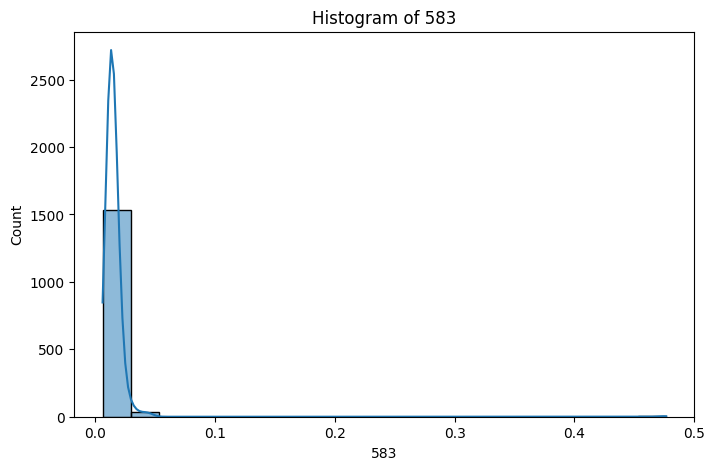

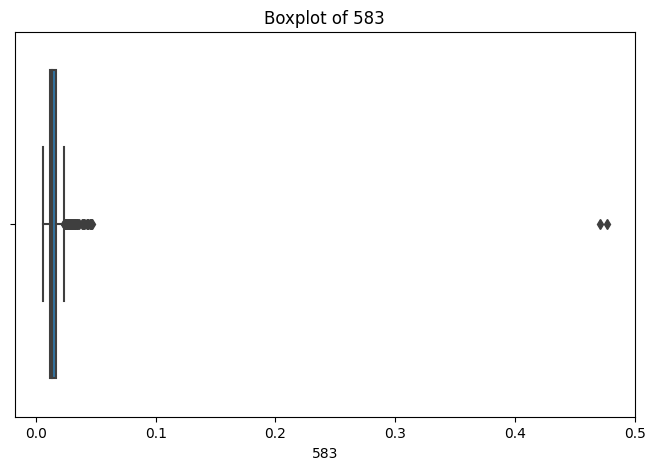

Summary for 586:
count    1567.000000
mean        0.021458
std         0.012354
min        -0.016900
25%         0.013450
50%         0.020500
75%         0.027600
max         0.102800
Name: 586, dtype: float64


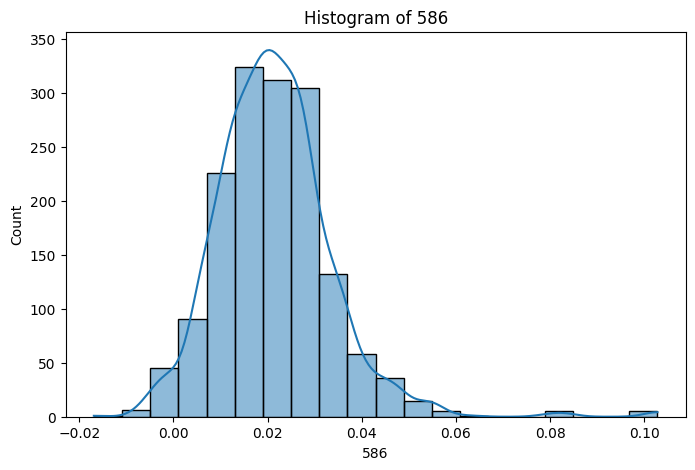

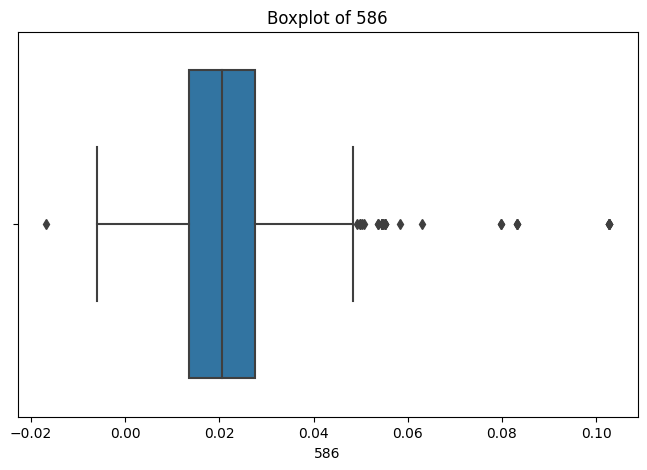

Summary for 587:
count    1567.000000
mean        0.016475
std         0.008805
min         0.003200
25%         0.010600
50%         0.014800
75%         0.020300
max         0.079900
Name: 587, dtype: float64


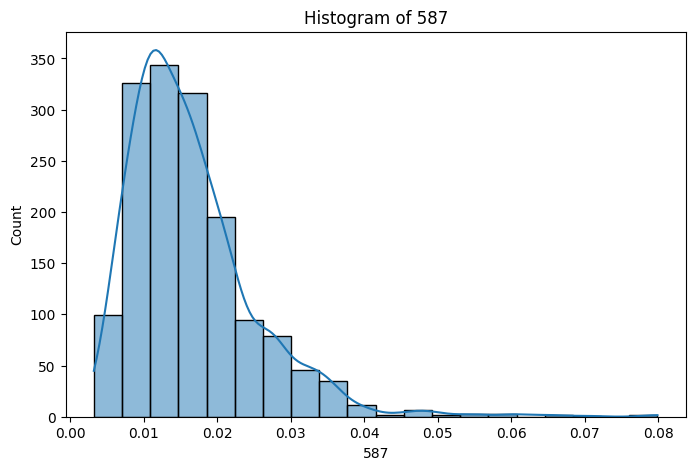

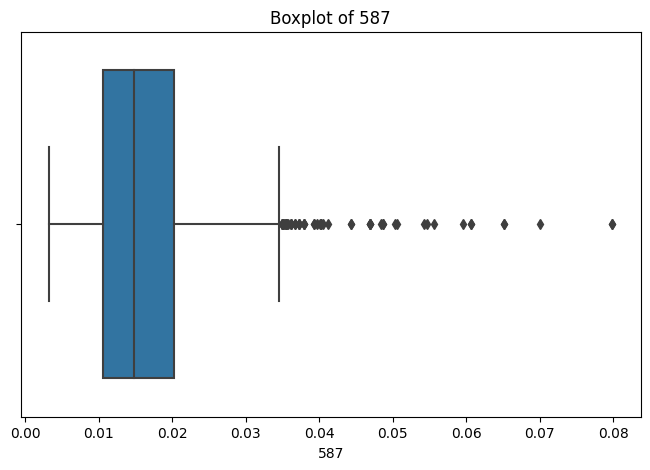

Summary for 589:
count    1567.000000
mean       99.670066
std        93.861936
min         0.000000
25%        44.368600
50%        72.023000
75%       114.749700
max       737.304800
Name: 589, dtype: float64


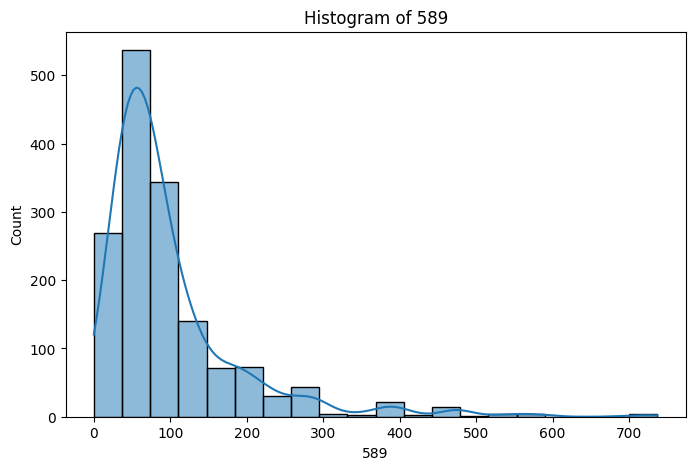

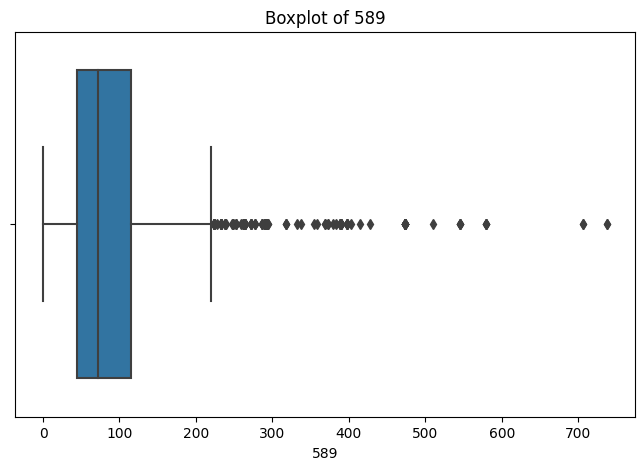

'With the histogram, we can visualize the data distribution in the selected columns, and we can get an idea about the outliers in each of the column with the help of the box plot'

In [25]:
#Q3 A - Perform a detailed univariate Analysis with appropriate detailed comments after each analysis.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Univariate Analysis for Numerical Variables
#Just taking a few of the columns for this purpose....
numerical_columns = ['0', '1', '2', '3', '4', '6', '7', '8', '9', '570', '571', '572', '573', '582', '583', '586', '587', '589']

for column in numerical_columns:
    # Summary Statistics
    print(f"Summary for {column}:")
    print(signaldata[column].describe())

    # Histogram
    plt.figure(figsize=(8, 5))
    sns.histplot(signaldata[column], kde=True, bins=20)
    plt.title(f'Histogram of {column}')
    plt.show()

    # Boxplot
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=signaldata[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


"""With the histogram, we can visualize the data distribution in the selected columns, and we can get an idea about the outliers in each of the column with the help of the box plot"""





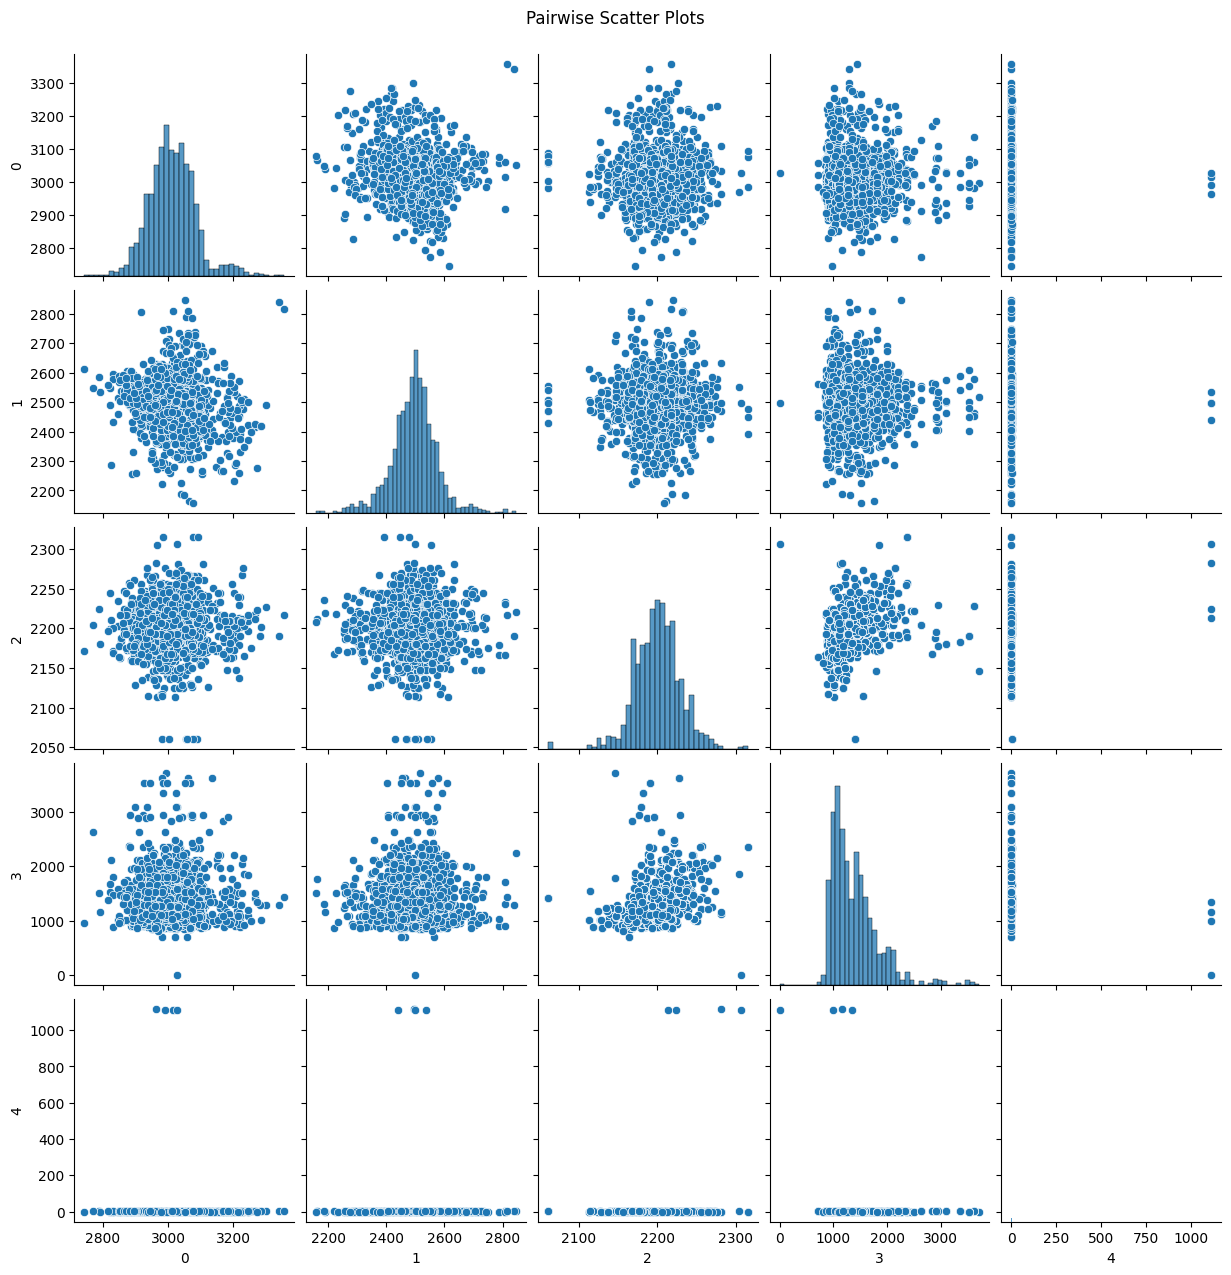

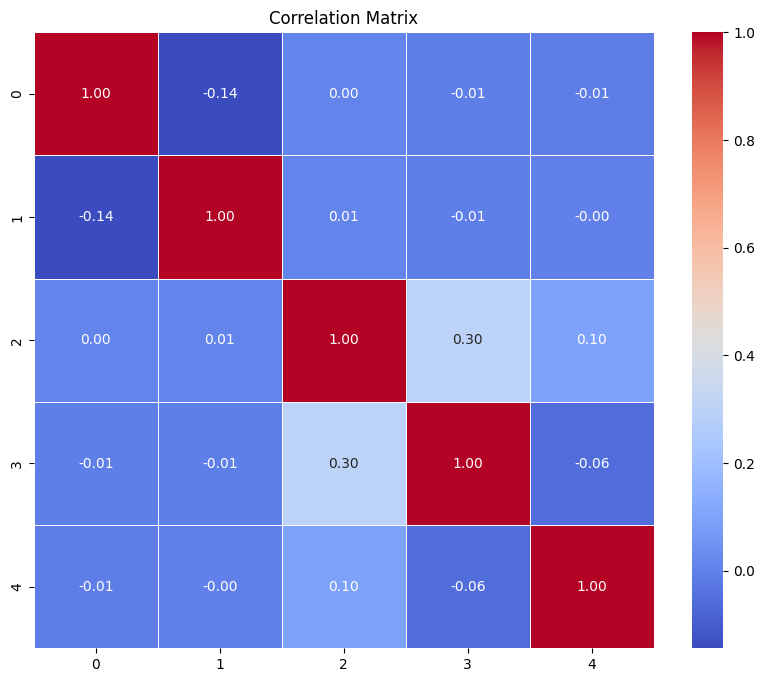

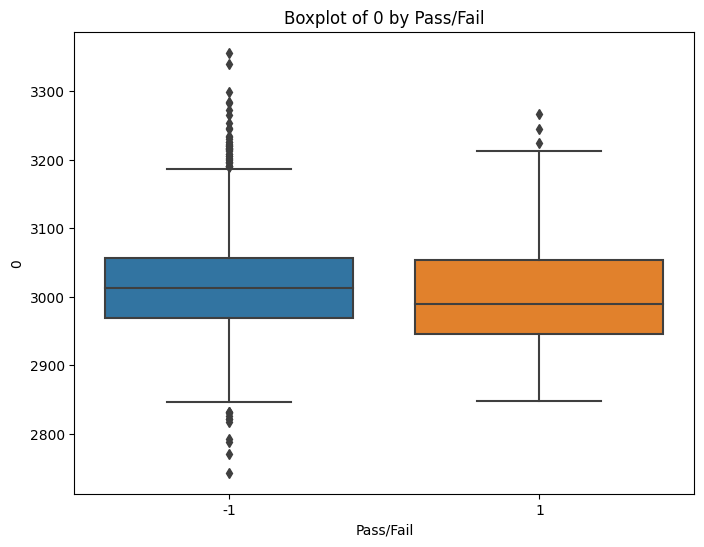

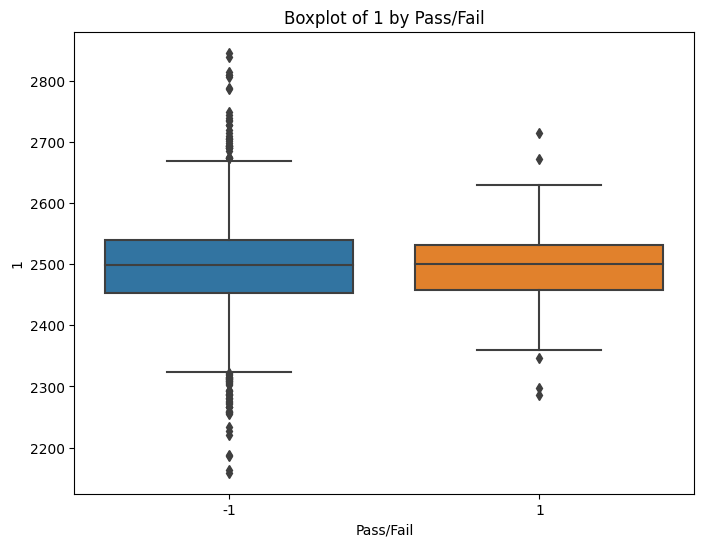

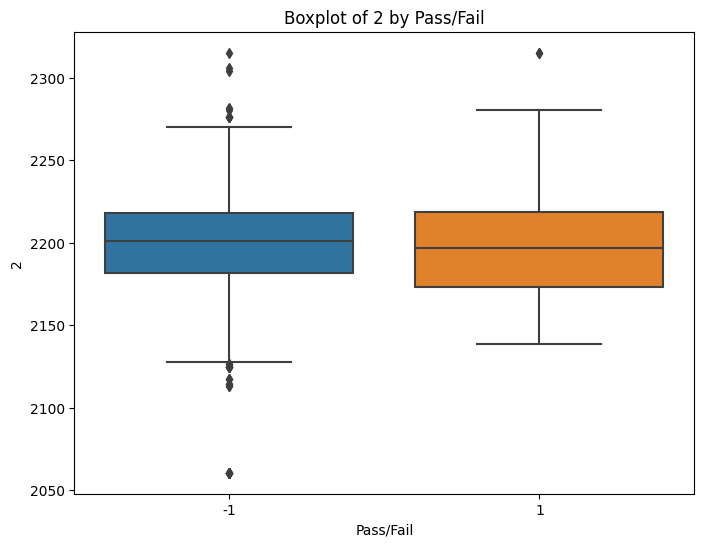

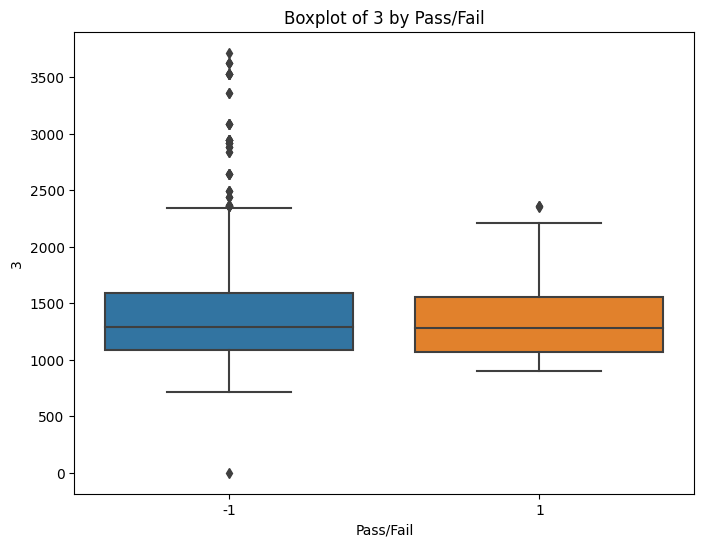

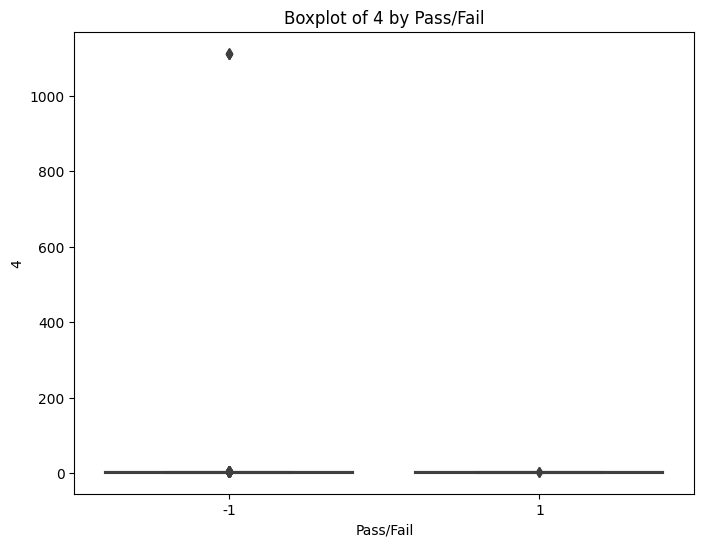

In [26]:
#Q3 B - Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis.

# Selecting the first 5 numerical columns
numerical_columns = ['0', '1', '2', '3', '4']

# Bivariate Analysis: Pairwise Scatter Plots
sns.pairplot(signaldata[numerical_columns])
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()



# Multivariate Analysis: Correlation Matrix
correlation_matrix = signaldata[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



# Multivariate Analysis: Boxplots by 'Pass/Fail'
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Pass/Fail', y=column, data=signaldata)
    plt.title(f'Boxplot of {column} by Pass/Fail')
    plt.show()




Note: Seeing the vast amount of data above, I have decided to focus only on 5 columns for the time being. If the necessity arises, I will include more of the columns in my data analysis.....

In [27]:
#Q4 A - Segregate predictors vs target attributes.

# Selecting the first 5 numerical columns as predictors
predictors = signaldata[['0', '1', '2', '3', '4']]

# Selecting the target attribute
target = signaldata['Pass/Fail']

# Display the first few rows of predictors and target
print("Predictors (First 5 numerical columns):")
print(predictors.head())

print("\nTarget (Pass/Fail):")
print(target.head())




Predictors (First 5 numerical columns):
         0        1          2          3       4
0  3030.93  2564.00  2187.7333  1411.1265  1.3602
1  3095.78  2465.14  2230.4222  1463.6606  0.8294
2  2932.61  2559.94  2186.4111  1698.0172  1.5102
3  2988.72  2479.90  2199.0333   909.7926  1.3204
4  3032.24  2502.87  2233.3667  1326.5200  1.5334

Target (Pass/Fail):
0   -1
1   -1
2    1
3   -1
4   -1
Name: Pass/Fail, dtype: int64


In [28]:
#Q4 B - Check for target balancing and fix it if found imbalanced.

import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


# Selecting the target attribute
target = signaldata['Pass/Fail']

# Check for target imbalance
print("Original class distribution:")
print(target.value_counts())

# Check the ratio of the minority to majority class
minority_class = target.value_counts().idxmin()
majority_class = target.value_counts().idxmax()
minority_to_majority_ratio = target.value_counts()[minority_class] / target.value_counts()[majority_class]
print(f"Minority to Majority Class Ratio: {minority_to_majority_ratio:.4f}")

# Check if the dataset is imbalanced (e.g., if the ratio is less than 0.2 or greater than 0.8)
if 0.2 <= minority_to_majority_ratio <= 0.8:
    print("Dataset is balanced.")
else:
    print("Dataset is imbalanced. Resampling...")

    # Resample to balance the classes
    oversampler = RandomOverSampler(sampling_strategy='auto')
    undersampler = RandomUnderSampler(sampling_strategy='auto')

    predictors_resampled, target_resampled = oversampler.fit_resample(predictors, target)
    predictors_resampled, target_resampled = undersampler.fit_resample(predictors_resampled, target_resampled)

    # Display the new class distribution
    print("\nResampled class distribution:")
    print(target_resampled.value_counts())

    # Update the predictors and target with the resampled data
    predictors = pd.DataFrame(predictors_resampled, columns=predictors.columns)
    target = pd.Series(target_resampled, name='Pass/Fail')

    print("\nResampling completed.")


Original class distribution:
-1    1463
 1     104
Name: Pass/Fail, dtype: int64
Minority to Majority Class Ratio: 0.0711
Dataset is imbalanced. Resampling...

Resampled class distribution:
-1    1463
 1    1463
Name: Pass/Fail, dtype: int64

Resampling completed.


In [29]:
#Q4 C - Perform train-test split and standardise the data or vice versa if required.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

# Step 2: Standardize the Data
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optionally, you can convert the scaled arrays back to DataFrames if needed
X_train_scaled = pd.DataFrame(X_train_scaled, columns=predictors.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=predictors.columns)

# Display the first few rows of the scaled data
print("Scaled Training Data:")
print(X_train_scaled.head())

print("\nScaled Test Data:")
print(X_test_scaled.head())


Scaled Training Data:
          0         1         2         3         4
0  0.599612  0.121951  0.725935  0.439915 -0.030971
1  2.359903  0.518716  1.509503  2.110547 -0.021467
2  0.366436 -1.669090  0.041401 -0.230647 -0.027265
3  1.340957 -0.217791 -1.022632 -1.164276 -0.033250
4  0.266788 -0.233246 -0.959507 -0.585950 -0.037717

Scaled Test Data:
          0         1         2         3         4
0  0.349560 -0.831326  0.728204 -0.379685 -0.050212
1  0.539053  0.561750  0.288983 -0.340338 -0.034925
2  2.178972 -2.387745 -1.043043 -0.720918 -0.035677
3 -0.324154 -0.681306  1.001109  0.737500 -0.029856
4  1.140667  0.096104 -0.364933 -0.561320 -0.030983


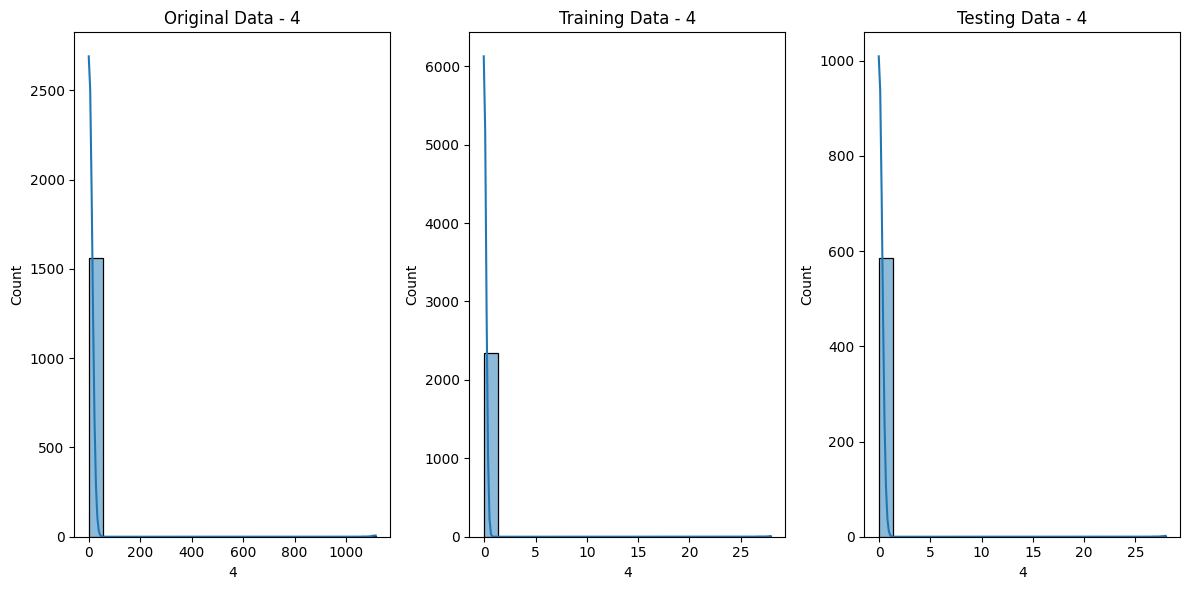

'Clearly, for the chosen columns, there seems to be significant similarity bw original, training and test data'

In [35]:
#Q4 D - Check if the train and test data have similar statistical characteristics when compared with original data.

"""Exploring the similarity of the datasets by plotting them"""

# Visualize the distribution of a specific column for comparison
selected_column = '4'

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.histplot(signaldata[selected_column], kde=True, bins=20)
plt.title(f'Original Data - {selected_column}')

plt.subplot(1, 3, 2)
sns.histplot(X_train_scaled[selected_column], kde=True, bins=20)
plt.title(f'Training Data - {selected_column}')

plt.subplot(1, 3, 3)
sns.histplot(X_test_scaled[selected_column], kde=True, bins=20)
plt.title(f'Testing Data - {selected_column}')

plt.tight_layout()
plt.show()


"""Clearly, for the chosen columns, there seems to be significant similarity bw original, training and test data"""


In [38]:
#Q5 A - Use any Supervised Learning technique to train a model.

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Train the model
clf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Display the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(confusion_mat)


Accuracy: 0.9881

Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.98      0.99       300
           1       0.98      1.00      0.99       286

    accuracy                           0.99       586
   macro avg       0.99      0.99      0.99       586
weighted avg       0.99      0.99      0.99       586


Confusion Matrix:
[[293   7]
 [  0 286]]


In [42]:
#Q5 B - Use cross validation techniques.
from sklearn.model_selection import cross_val_score
# Initialize the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(clf, X_test_scaled, y_test, cv=5, scoring='accuracy')

# Display the cross-validation scores
print("Cross-Validation Scores:")
print(cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print(f"\nMean Cross-Validation Score: {mean_cv_score:.4f}")
print(f"Standard Deviation of Cross-Validation Scores: {std_cv_score:.4f}")

Cross-Validation Scores:
[0.90677966 0.86324786 0.86324786 0.84615385 0.88034188]

Mean Cross-Validation Score: 0.8720
Standard Deviation of Cross-Validation Scores: 0.0205


In [50]:
# Assuming 'predictors', 'target' are your selected predictors and target variable
# Replace these variables with your actual data if they have different names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Display the results
print(f"Best Hyperparameters: {best_params}")
print(f"Best Model Accuracy: {accuracy:.4f}")


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Model Accuracy: 0.9863


In [52]:
#Q5 D - Use any other technique/method which can enhance the model performance.

# Create new features: mean and standard deviation
predictors['mean_features'] = predictors.mean(axis=1)
predictors['std_features'] = predictors.std(axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Display the results
print(f"Best Hyperparameters: {best_params}")
print(f"Best Model Accuracy: {accuracy:.4f}")

KeyboardInterrupt: ignored

In [55]:
#Q5 E - Display and explain the classification report in detail.


# Display the classification report
classification_rep = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(classification_rep)



"""Precision: Precision is the number of true positive predictions divided by the total number of positive predictions. It measures the accuracy of the positive predictions.

Recall (Sensitivity or True Positive Rate): Recall is the number of true positive predictions divided by the total number of actual positives. It measures the ability of the model to capture all the positive instances.

F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. F1-score is especially useful when there is an uneven class distribution.

Support: The number of actual occurrences of the class in the specified dataset.

Accuracy: The proportion of correctly classified instances (sum of true positives and true negatives) out of the total number of instances.

Macro avg: The average of precision, recall, and F1-score across all classes. It treats all classes equally.

Weighted avg: The weighted average of precision, recall, and F1-score, where each class contribution is weighted by the number of true instances."""

Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.97      0.98       300
           1       0.97      1.00      0.98       286

    accuracy                           0.98       586
   macro avg       0.98      0.98      0.98       586
weighted avg       0.98      0.98      0.98       586



'Precision: Precision is the number of true positive predictions divided by the total number of positive predictions. It measures the accuracy of the positive predictions.\n\nRecall (Sensitivity or True Positive Rate): Recall is the number of true positive predictions divided by the total number of actual positives. It measures the ability of the model to capture all the positive instances.\n\nF1-score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. F1-score is especially useful when there is an uneven class distribution.\n\nSupport: The number of actual occurrences of the class in the specified dataset.\n\nAccuracy: The proportion of correctly classified instances (sum of true positives and true negatives) out of the total number of instances.\n\nMacro avg: The average of precision, recall, and F1-score across all classes. It treats all classes equally.\n\nWeighted avg: The weighted average of precision, recall, and F1-sc

In [56]:
#Q5 F - Apply the above steps for all possible models that you have learnt so far.

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Assuming 'predictors' and 'target' are your selected predictors and target variable
# Replace these variables with your actual data if they have different names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

# List of models to try
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression()
}

# Loop through each model
for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")

    # Hyperparameter tuning using GridSearchCV
    param_grid = {}  # Define hyperparameter grid based on the model

    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Make predictions on the test set using the best model
    y_pred = best_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)

    # Display the results
    print(f"Best Hyperparameters for {model_name}: {best_params}")
    print(f"{model_name} Model Accuracy: {accuracy:.4f}")

    # Display classification report
    classification_rep = classification_report(y_test, y_pred)
    print(f"\nClassification Report for {model_name}:\n{classification_rep}\n")


Training and evaluating Random Forest...
Best Hyperparameters for Random Forest: {}
Random Forest Model Accuracy: 0.9863

Classification Report for Random Forest:
              precision    recall  f1-score   support

          -1       1.00      0.97      0.99       300
           1       0.97      1.00      0.99       286

    accuracy                           0.99       586
   macro avg       0.99      0.99      0.99       586
weighted avg       0.99      0.99      0.99       586


Training and evaluating Support Vector Machine...
Best Hyperparameters for Support Vector Machine: {}
Support Vector Machine Model Accuracy: 0.4949

Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

          -1       0.57      0.06      0.10       300
           1       0.49      0.95      0.65       286

    accuracy                           0.49       586
   macro avg       0.53      0.51      0.38       586
weighted avg       0.53      0.49     

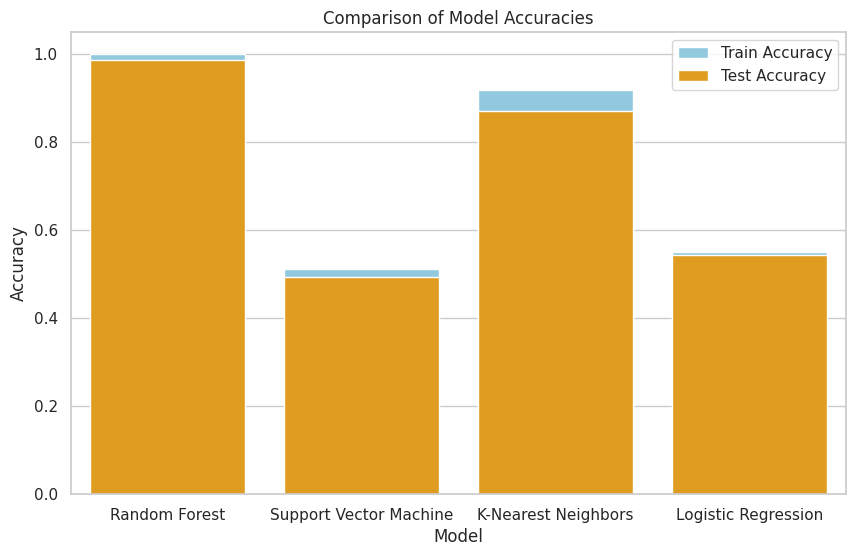

In [58]:
#Q6 A- Display and compare all the models designed with their train and test accuracies.

import matplotlib.pyplot as plt
import seaborn as sns

# Convert the results dictionary to a DataFrame for easy plotting
results_df = pd.DataFrame(results)

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot for comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Train Accuracy', data=results_df, color='skyblue', label='Train Accuracy')
sns.barplot(x='Model', y='Test Accuracy', data=results_df, color='orange', label='Test Accuracy')
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [60]:
#Q6 B - Select the final best trained model along with your detailed comments for selecting this model.

"""I am going to select Knn becauseit has significantly more accuracy than Logistic Regression and SVM. Although Random Forest has more accuracy, It has clearly overfit. Hence, I am going with KNN"""

'I am going to select Knn becauseit has significantly more accuracy than Logistic Regression and SVM. Although Random Forest has more accuracy, It has clearly overfit. Hence, I am going with KNN'

In [66]:
#Q6 C - Write your conclusion on the results.

"""THis is my conclusion on the results:
Model  Train Accuracy  Test Accuracy
0           Random Forest        1.000000       0.986348
1  Support Vector Machine        0.511966       0.494881
2     K-Nearest Neighbors        0.919231       0.872014
3     Logistic Regression        0.549573       0.544369"""

#Yaay :)

'THis is my conclusion on the results:\nModel  Train Accuracy  Test Accuracy\n0           Random Forest        1.000000       0.986348\n1  Support Vector Machine        0.511966       0.494881\n2     K-Nearest Neighbors        0.919231       0.872014\n3     Logistic Regression        0.549573       0.544369'